In [ ]:
# 한글 폰트 설치 및 재실행
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [16]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
import re

In [18]:
df_news = pd.read_excel("bigkinds.xlsx")
df_news = df_news[["일자", "언론사", "제목", "본문"]].head(100)
df_news.shape

(100, 4)

In [ ]:
!pip install konlpy

In [20]:
# 본문 내용을 형태소(명사:nouns) 분석
from konlpy.tag import Okt
from tqdm import tqdm

okt = Okt()
DataSet = []

for i in df_news["본문"]:
    DataSet.append(okt.nouns(re.sub("[^가-힣a-zA-Z ]", "", i)))

print(DataSet[:5])

[['자녀', '본격', '방학', '여름', '바캉스', '시즌', '시작', '코로나', '차', '대유행', '사람', '집', '휴가', '야외', '이동', '중', '언제', '어디', '코로나', '가족', '감염', '알', '수', '장거리', '여행', '때문', '집', '요리', '게임', '수', '때', '가족'], ['미국', '약사', '더', '생산', '문제', '이유', '달', '공급', '못', '신종', '코로나바이러스', '감염증', '코로나', '백신', '물량', '중', '상당', '부분', '다음', '주', '이', '정부', '접종', '일정', '진행', '세', '접종', '당초', '계획', '월', '하순', '월', '시행', '방침', '손영래', '중앙', '사고', '수습', '본부', '사회', '전략', '반장', '일', '온라인', '정례', '브리'], ['애플', '아이폰', '시리즈', '판매량', '확대', '애플', '뮤직', '등', '서비스', '분야', '성장', '바탕', '역대', '분기', '매출', '달성', '반도체', '부족', '일부', '제품', '공급', '차질', '빚었으', '재택근무', '격', '수업', '영향', '아이패드', '맥북', '등', '판매', '증가', '전', '사업', '부문', '이상', '성장', '애플', '올해', '분기', '애플', '회계', '기준', '년', '분기', '매출', '억'], ['머니투데이', '안정', '준', '기자', '더', '코로나', '백신', '공급', '차질', '차', '대유행', '위', '접종', '속도', '전이', '절실', '가운데', '제약', '바이오', '업계', '의약품', '대량', '생산', '유통', '경험', '일천', '더', '의', '전', '세계', '플라이', '체인', '연쇄', '생산', '공급망', '구조', '상', '언제', '발생', '일', '

In [21]:
tren = TransactionEncoder()
tren_arr = tren.fit(DataSet).transform(DataSet)

In [22]:
# tren.columns_

tren_df = pd.DataFrame(tren_arr, columns=tren.columns_)
tren_df.head()

,가가,가결,가기,가능성,가맹,가석방,가속,가수,가스,가시,...,훌쩍,휴가,휴먼시아,휴식,흑인,흑자,희망,히데,힐링,힘
0,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [23]:
aprItem = apriori(tren_df, min_support=0.1, use_colnames=True)
aprItem

,support,itemsets
0,0.10,(가운데)
1,0.18,(것)
2,0.14,(경제)
3,0.13,(공급)
4,0.11,(기업)
...,...,...
77,0.10,"(코로나, 확, 일)"
78,0.15,"(진자, 코로나, 확)"
79,0.10,"(더, 코로나, 백신, 공급)"
80,0.13,"(진자, 코로나, 확, 명)"


In [24]:
from mlxtend.frequent_patterns import association_rules
association_rules(aprItem, metric="lift", min_threshold=1.0)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(경제),(일),0.14,0.61,0.11,0.785714,1.288056,0.0246,1.820000
1,(일),(경제),0.61,0.14,0.11,0.180328,1.288056,0.0246,1.049200
2,(더),(공급),0.14,0.13,0.10,0.714286,5.494505,0.0818,3.045000
3,(공급),(더),0.13,0.14,0.10,0.769231,5.494505,0.0818,3.726667
4,(백신),(공급),0.14,0.13,0.10,0.714286,5.494505,0.0818,3.045000
...,...,...,...,...,...,...,...,...,...
157,"(확, 일)","(진자, 코로나)",0.10,0.15,0.10,1.000000,6.666667,0.0850,inf
158,(진자),"(코로나, 확, 일)",0.15,0.10,0.10,0.666667,6.666667,0.0850,2.700000
159,(코로나),"(진자, 확, 일)",0.62,0.10,0.10,0.161290,1.612903,0.0380,1.073077
160,(확),"(진자, 일, 코로나)",0.15,0.10,0.10,0.666667,6.666667,0.0850,2.700000


### networkx 라이브러리
- https://networkx.org/ 참조
- 데이터 간의 상관관계나 연결성을 그래프로 표시

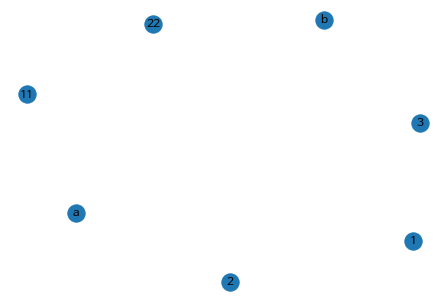

In [3]:
import networkx as nx

# 객체 생성
g1 = nx.Graph()

# 노드 삽입
g1.add_node("a")
g1.add_node("1")
g1.add_node("2")
g1.add_node("3")
g1.add_node("b")

g1.add_nodes_from([11, 22])

# 그래프 그리기
nx.draw(g1, with_labels = True,
        font_family="NanumBarunGothic")

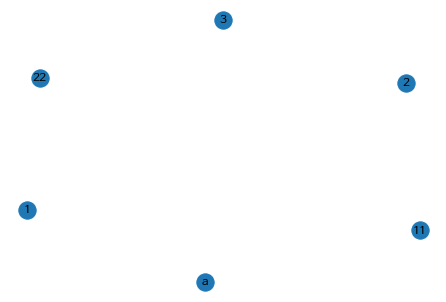

In [4]:
# node 제거
g1.remove_node("b")

# 그래프 그리기
nx.draw(g1, with_labels = True,
        font_family="NanumBarunGothic")

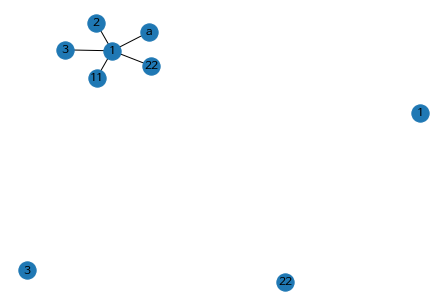

In [13]:
# edge 추가
g1.add_edge(1, "a")
g1.add_edge(1, "2")
g1.add_edge(1, 22)

g1.add_edges_from([(1, 3), (1, 11)])

nx.draw(g1, with_labels = True,
        font_family="NanumBarunGothic")

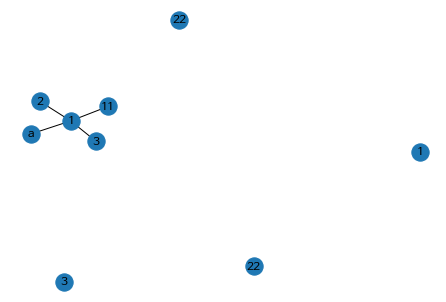

In [14]:
# edge 제거
g1.remove_edge(1, 22)

nx.draw(g1, with_labels = True,
        font_family="NanumBarunGothic")

In [17]:
df=pd.DataFrame({'from':["A", "B", "C", "A", "D", "E"],
                 'to':['D', "A", "E", "F","B", "E"],
                 'weight':[1,2,3,4,5,6]})
print(df)

  from to  weight
0    A  D       1
1    B  A       2
2    C  E       3
3    A  F       4
4    D  B       5
5    E  E       6


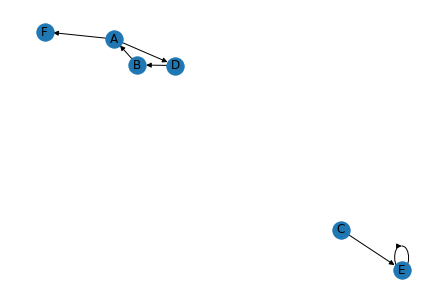

In [25]:
gra = nx.from_pandas_edgelist(df, "from", "to", create_using=nx.DiGraph)
nx.draw(gra, with_labels=True)

In [19]:
df_news

,일자,언론사,제목,본문
0,20210728,한국일보,집에서 만들어 먹는 정통 프랑스 샌드위치,자녀들이 본격적인 방학에 들어가면서 여름 바캉스 시즌이 시작됐다. 하지만 코로나19...
1,20210728,세계일보,"""연기된 모더나 백신 상당량 내주 공급 50대 접종 예정대로""",미국 제약사 모더나가 생산 문제를 이유로 이달에 공급하지 못한 신종 코로나바이러스 ...
2,20210728,전자신문,"애플, 분기 매출 94조원... 아이폰 매출 전년比 50% 증가",애플이 아이폰 시리즈 판매량 확대와 애플TV・뮤직 등 서비스 분야 성장을 바탕으로 ...
3,20210728,머니투데이,흔들리는 백신 서플라이체인 모더나가 불안하다,[머니투데이 안정준 기자] 모더나 코로나19(COVID-19) 백신 공급 차질이 '...
4,20210728,MBC,"""두 전직 대통령, 광복절 특사 시간상 불가능""",박범계 법무부 장관은 복역 중인 두 전직 대통령의 8 15 광복절 특별사면 가능성에...
...,...,...,...,...
95,20210728,중앙일보,‘5월의 신부’ 역대 최소 올해 결혼 8만쌍 턱걸이,올해 5월까지 결혼한 부부가 8만쌍을 겨우 넘었다. 통계 작성 이래 가장 적은 숫자...
96,20210728,한국일보,"""서욱 교체 없다"" '국방장관 경질론'에 선 그은 청와대",서욱 국방부 장관에 대한 일각의 경질론에 청와대가 거듭 선을 그었다. 청해부대 34...
97,20210728,아시아경제,[시시비비]화를 부르는 자화자찬,"국토교통부는 지난 21일 임대차 3법 시행효과라는 자료를 냈다. 국토부는 ""임대차 ..."
98,20210728,디지털타임스,"프리미엄 실리콘 마스크 스트랩 ‘트위그’, 와디즈 펀딩 오픈 2개월만에 ‘1만개’ ...","프리미엄 실리콘 마스크 스트랩 트위그를 기획, 제작한 '트위그(Twigg)'가 20..."


In [ ]:
# 본문 내용을 형태소(명사:nouns) 분석
from konlpy.tag import Okt
from tqdm import tqdm

okt = Okt()
DataSet = []

for i in df_news["본문"]:
    DataSet.append(okt.nouns(re.sub("[^가-힣a-zA-Z ]", "", i)))

print(DataSet[:5])

In [ ]:
!pip install apyori

In [29]:
from apyori import apriori

support_res = (list(apriori(DataSet, min_support=0.06)))

df1 = pd.DataFrame(support_res)
df1

,items,support,ordered_statistics
0,(가운데),0.10,"[((), (가운데), 0.1, 1.0)]"
1,(가장),0.07,"[((), (가장), 0.07, 1.0)]"
2,(감염증),0.08,"[((), (감염증), 0.08, 1.0)]"
3,(개),0.09,"[((), (개), 0.09, 1.0)]"
4,(거리),0.07,"[((), (거리), 0.07, 1.0)]"
...,...,...,...
431,"(진자, 코로나, 신규, 확, 명)",0.07,"[((), (진자, 코로나, 확, 신규, 명), 0.07, 1.0), ((명), (..."
432,"(진자, 코로나, 확, 명, 일)",0.09,"[((), (진자, 코로나, 확, 일, 명), 0.09, 1.0), ((명), (진..."
433,"(진자, 코로나, 확, 최, 명)",0.06,"[((), (진자, 코로나, 확, 최, 명), 0.06, 1.0), ((명), (최..."
434,"(차질, 더, 코로나, 백신, 공급, 기자)",0.06,"[((), (차질, 더, 코로나, 공급, 백신, 기자), 0.06, 1.0), ((..."


In [31]:
df1["length"] = df1["items"].apply(lambda x: len(x))
df1

,items,support,ordered_statistics,length
0,(가운데),0.10,"[((), (가운데), 0.1, 1.0)]",1
1,(가장),0.07,"[((), (가장), 0.07, 1.0)]",1
2,(감염증),0.08,"[((), (감염증), 0.08, 1.0)]",1
3,(개),0.09,"[((), (개), 0.09, 1.0)]",1
4,(거리),0.07,"[((), (거리), 0.07, 1.0)]",1
...,...,...,...,...
431,"(진자, 코로나, 신규, 확, 명)",0.07,"[((), (진자, 코로나, 확, 신규, 명), 0.07, 1.0), ((명), (...",5
432,"(진자, 코로나, 확, 명, 일)",0.09,"[((), (진자, 코로나, 확, 일, 명), 0.09, 1.0), ((명), (진...",5
433,"(진자, 코로나, 확, 최, 명)",0.06,"[((), (진자, 코로나, 확, 최, 명), 0.06, 1.0), ((명), (최...",5
434,"(차질, 더, 코로나, 백신, 공급, 기자)",0.06,"[((), (차질, 더, 코로나, 공급, 백신, 기자), 0.06, 1.0), ((...",6


In [32]:
# df에서 length의 값이 2인 데이터만 추출
df2 = df1[(df1["length"] == 2) & (df1["support"] >= 0.07)].sort_values(by="support", ascending=False)
df2

,items,support,ordered_statistics,length
238,"(코로나, 일)",0.33,"[((), (코로나, 일), 0.33, 1.0), ((일), (코로나), 0.540...",2
167,"(일, 등)",0.22,"[((), (일, 등), 0.22, 1.0), ((등), (일), 0.6666666...",2
169,"(코로나, 등)",0.19,"[((), (코로나, 등), 0.19, 1.0), ((등), (코로나), 0.575...",2
226,"(코로나, 이)",0.17,"[((), (코로나, 이), 0.17, 1.0), ((이), (코로나), 0.809...",2
144,"(기자, 코로나)",0.17,"[((), (기자, 코로나), 0.17, 1.0), ((기자), (코로나), 0.6...",2
...,...,...,...,...
201,"(서울, 일)",0.07,"[((), (서울, 일), 0.07, 1.0), ((서울), (일), 1.0, 1....",2
153,"(다음, 코로나)",0.07,"[((), (다음, 코로나), 0.07, 1.0), ((다음), (코로나), 1.0...",2
205,"(코로나, 수)",0.07,"[((), (코로나, 수), 0.07, 1.0), ((수), (코로나), 0.437...",2
206,"(시, 일)",0.07,"[((), (시, 일), 0.07, 1.0), ((시), (일), 0.7000000...",2


In [35]:
# networkx 이미지 출력
g = nx.Graph()
arp = (df2["items"])
g.add_edges_from(arp)
print(arp)
print(g)

238     (코로나, 일)
167       (일, 등)
169     (코로나, 등)
226     (코로나, 이)
144    (기자, 코로나)
         ...    
201      (서울, 일)
153    (다음, 코로나)
205     (코로나, 수)
206       (시, 일)
203    (코로나, 세계)
Name: items, Length: 115, dtype: object
Graph with 57 nodes and 115 edges


In [36]:
import numpy as np

news_nx = nx.pagerank(g)
news_nx

{'가운데': 0.006202715305778605,
 '감염증': 0.01431371805101541,
 '개': 0.00620372652149561,
 '것': 0.013127475529824639,
 '경제': 0.01652578321355768,
 '공급': 0.0222179391050181,
 '관련': 0.00620372652149561,
 '국내': 0.006202715305778605,
 '기업': 0.009556339171414456,
 '기자': 0.05131468659322485,
 '날': 0.00620372652149561,
 '년': 0.016915262681381313,
 '다음': 0.006202715305778605,
 '달': 0.009774862879905795,
 '대한': 0.006202715305778605,
 '더': 0.029463447385055703,
 '도쿄올림픽': 0.00620372652149561,
 '등': 0.03549693719219168,
 '머니투데이': 0.005747157735673497,
 '명': 0.022684135337984437,
 '물량': 0.015613994884641932,
 '미국': 0.006202715305778605,
 '및': 0.00620372652149561,
 '발표': 0.009774862879905795,
 '방역': 0.006202715305778605,
 '백신': 0.025804307486958597,
 '본부': 0.00620372652149561,
 '비': 0.006202715305778605,
 '사회': 0.006202715305778605,
 '생산': 0.006202715305778605,
 '서울': 0.00620372652149561,
 '세': 0.006202715305778605,
 '세계': 0.006202715305778605,
 '수': 0.009774862879905795,
 '시': 0.012890441668210871,
 '신

In [38]:
nsize = np.array([val for val in news_nx.values()])
nsize = 2000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))
nsize

array([2000.        , 1655.90558024,  348.56708513,  122.9765109 ,
        533.8977633 ,   89.30464406,  198.44425813,  198.44425813,
        198.44425813,   86.47243468,  235.00215304,  277.87493233,
        192.98201051,   47.19112099,   86.47243468,  126.28914006,
          5.34944641,  130.85252592,   47.19112099,   47.19112099,
         83.86956744,   44.63076009,  115.60605582,    5.33759837,
          5.33759837,    5.34944641,   82.99732781,    0.        ,
          5.33759837,   47.19112099,    5.33759837,   44.63076009,
          5.33759837,   83.69519721,   47.19112099,  100.37119647,
        100.37119647,    5.33759837,  100.37119647,  115.60605582,
          5.33759837,    5.34944641,    5.34944641,  118.29178833,
          5.34944641,    5.33759837,   47.19112099,    5.34944641,
          5.34944641,    5.33759837,    5.34944641,    5.34944641,
          5.33759837,    5.33759837,    5.34944641,    5.33759837,
          5.33759837])

In [39]:
pos = nx.circular_layout(g)
pos

{'가운데': array([-0.99848151,  0.05508771]),
 '감염증': array([-0.67728162, -0.73572386]),
 '개': array([-0.92649406,  0.37630933]),
 '것': array([0.02755432, 0.99962031]),
 '경제': array([-0.08257933,  0.99658447]),
 '공급': array([0.2454855 , 0.96940028]),
 '관련': array([-0.19171075, -0.98145146]),
 '국내': array([-0.29851502, -0.95440495]),
 '기업': array([-0.96226799, -0.27210352]),
 '기자': array([0.90435719, 0.4267764 ]),
 '날': array([ 0.54694808, -0.83716649]),
 '년': array([-0.29851481,  0.954405  ]),
 '다음': array([ 0.9757964 , -0.21868107]),
 '달': array([ 0.35063735, -0.93651134]),
 '대한': array([-0.59223521, -0.80576516]),
 '더': array([0.35063756, 0.93651121]),
 '도쿄올림픽': array([ 0.45153323, -0.8922543 ]),
 '등': array([0.9757964 , 0.21868108]),
 '머니투데이': array([-0.98636132,  0.16459462]),
 '명': array([0.78914052, 0.61421269]),
 '물량': array([-0.40169525, -0.9157734 ]),
 '미국': array([ 0.63572377, -0.77191663]),
 '및': array([ 0.71678257, -0.69729674]),
 '발표': array([0.13735361, 0.99052208]),
 '방역': 

In [43]:
import matplotlib.pyplot as plt

font_family = "NanumBarunGothic"

plt.figure(figsize=(10, 10))

nx.draw_networkx(g, pos=pos, node_color=list(news_nx.values(), node_size=nsize,
                                             alpha=0.5, edge_color="0.5",
                                             font_family=font_family, font_size=15))

plt.draw()

TypeError: ignored

<Figure size 720x720 with 0 Axes>